In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
!curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 15  836k   15  128k    0     0   750k      0  0:00:01 --:--:--  0:00:01  757k
100  836k  100  836k    0     0  1905k      0 --:--:-- --:--:-- --:--:-- 1910k


In [6]:
data = pd.read_csv("marathon-data.csv")
print(data.dtypes)
data.head()

age        int64
gender    object
split     object
final     object
dtype: object


,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [15]:
data["split"] = pd.to_timedelta(data["split"])
data["final"] = pd.to_timedelta(data["final"])

data["split_sec"] = data["split"].dt.total_seconds()
data["final_sec"] = data["final"].dt.total_seconds()

In [16]:
print(data.dtypes)
print(data.shape)
data.head()

age                    int64
gender                object
split        timedelta64[ns]
final        timedelta64[ns]
split_sec            float64
final_sec            float64
dtype: object
(37250, 6)


,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


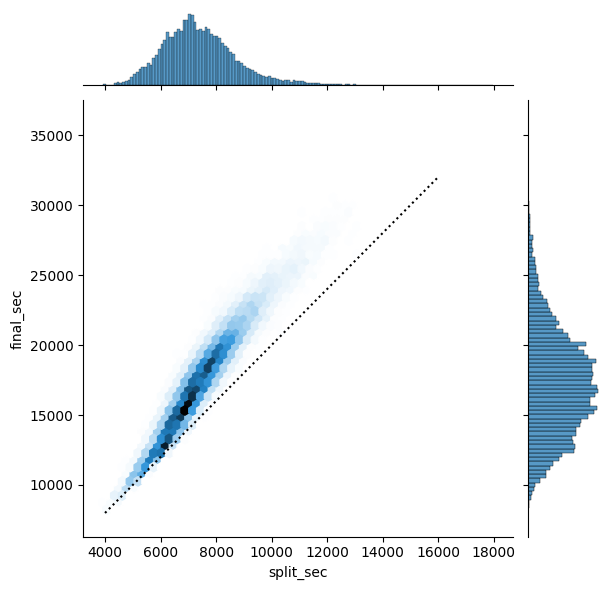

In [18]:
g = sns.jointplot(x="split_sec", y="final_sec", data=data, kind="hex")
g.ax_joint.plot(np.linspace(4000, 16000), np.linspace(8000, 32000), ":k")

In [19]:
data["split_frac"] = 1 - 2 * data["split_sec"] / data["final_sec"]
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842


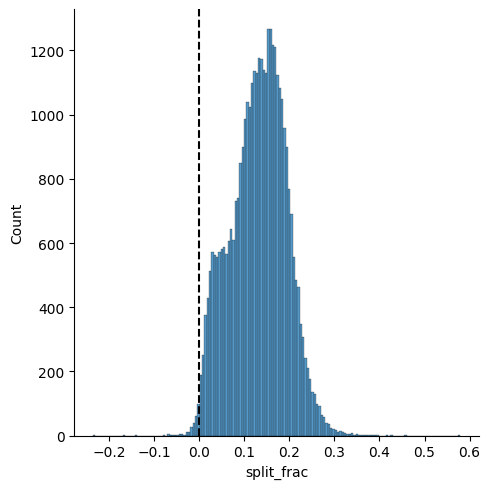

In [20]:
sns.displot(data["split_frac"], kde=False)
plt.axvline(0, color="k", linestyle="--");

In [22]:
sum(data.split_frac < 0)

251

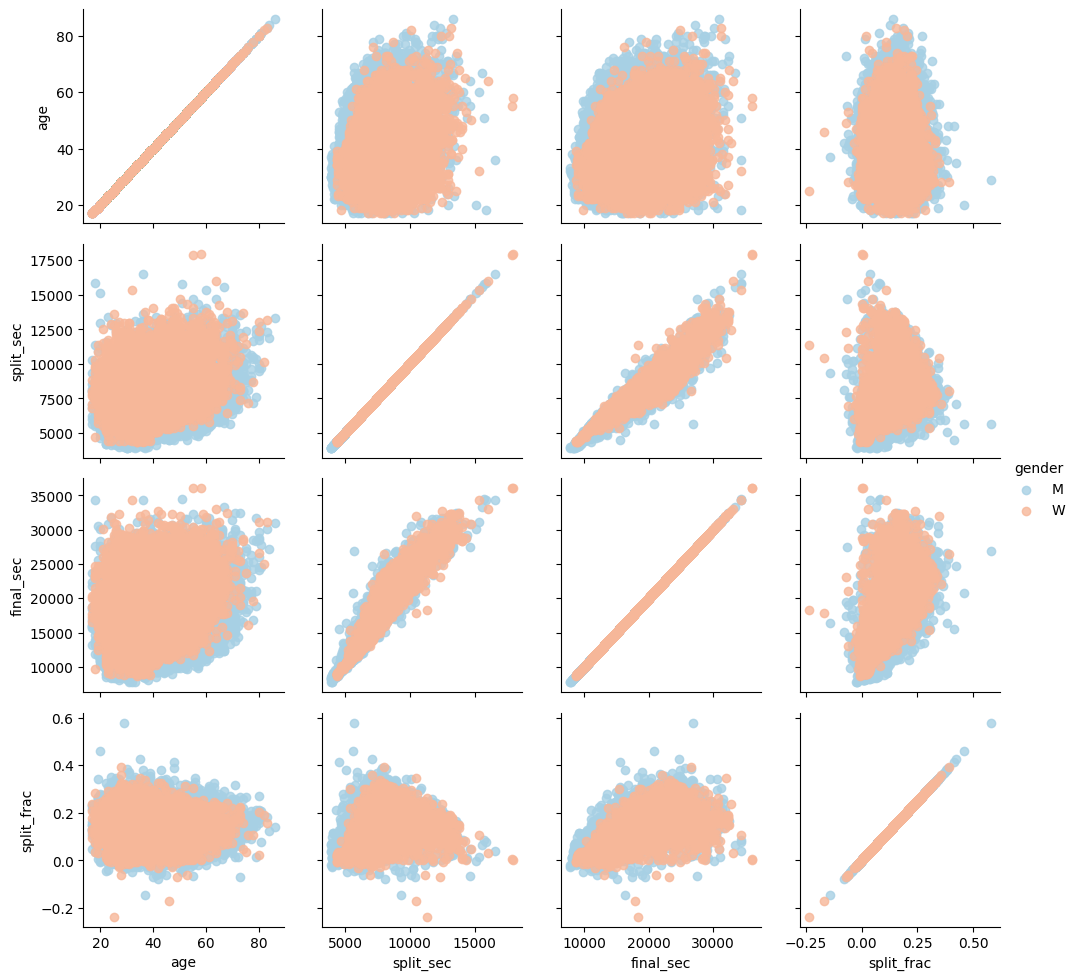

In [23]:
g = sns.PairGrid(
    data,
    vars=["age", "split_sec", "final_sec", "split_frac"],
    hue="gender",
    palette="RdBu_r",
)
g.map(plt.scatter, alpha=0.8)
g.add_legend();

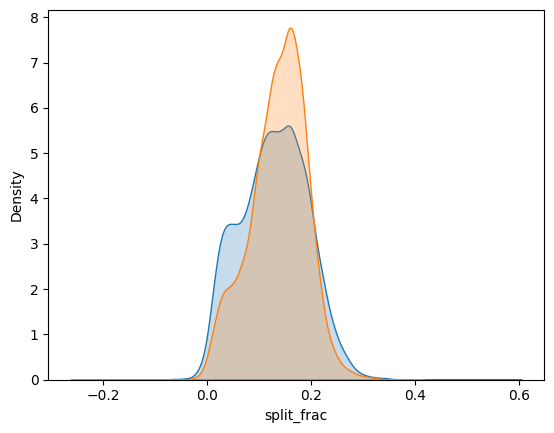

In [25]:
sns.kdeplot(data.split_frac[data.gender == "M"], label="men", fill=True)
sns.kdeplot(data.split_frac[data.gender == "W"], label="women", fill=True)
plt.xlabel("split_frac");

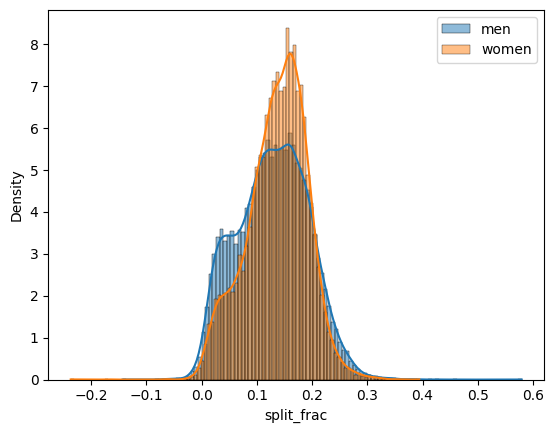

In [29]:
sns.histplot(
    data.split_frac[data.gender == "M"],
    label="men",
    fill=True,
    kde=True,
    stat="density",
)
sns.histplot(
    data.split_frac[data.gender == "W"],
    label="women",
    fill=True,
    kde=True,
    stat="density",
)
plt.xlabel("split_frac")
plt.legend();

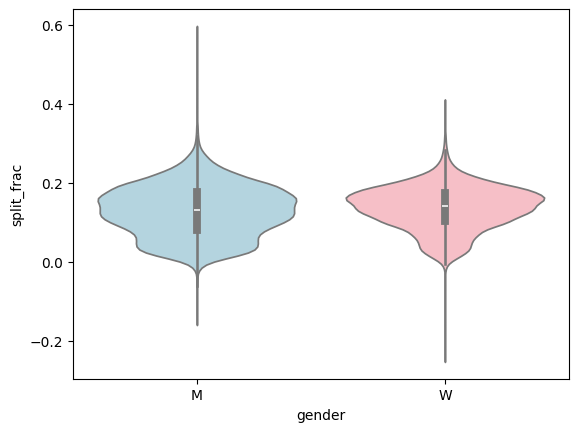

In [32]:
sns.violinplot(
    x="gender",
    y="split_frac",
    data=data,
    palette=["lightblue", "lightpink"],
    hue="gender",
);

In [33]:
data["age_dec"] = data.age.map(lambda age: 10 * (age // 10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842,30


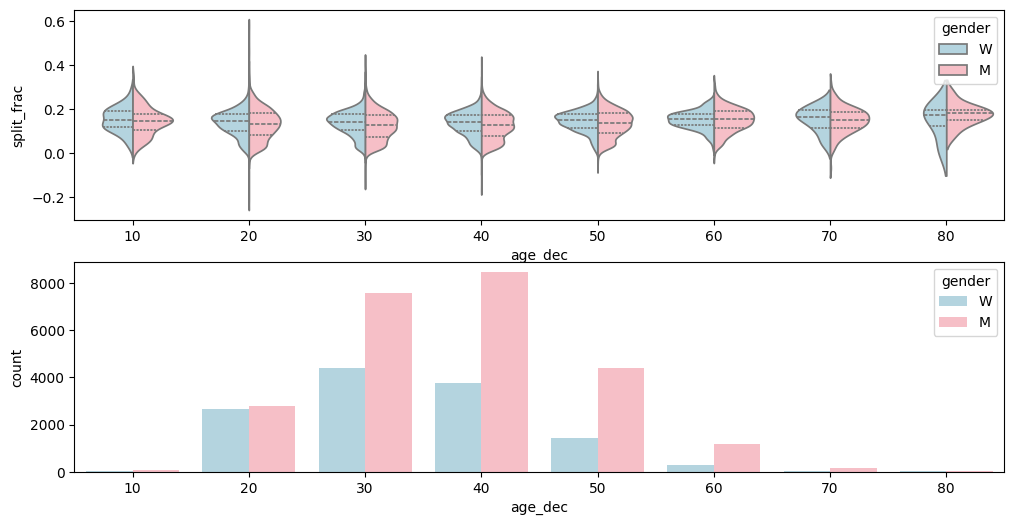

In [61]:
fig, ax = plt.subplots(2, 1, figsize=(12, 6))

sns.violinplot(
    x="age_dec",
    y="split_frac",
    hue="gender",
    ax=ax[0],
    data=data,
    split=True,
    inner="quartile",
    palette=["lightblue", "lightpink"],
);

g = sns.countplot(
    data,
    x="age_dec",
    hue="gender",
    ax=ax[1],
    palette=["lightblue", "lightpink"]
)


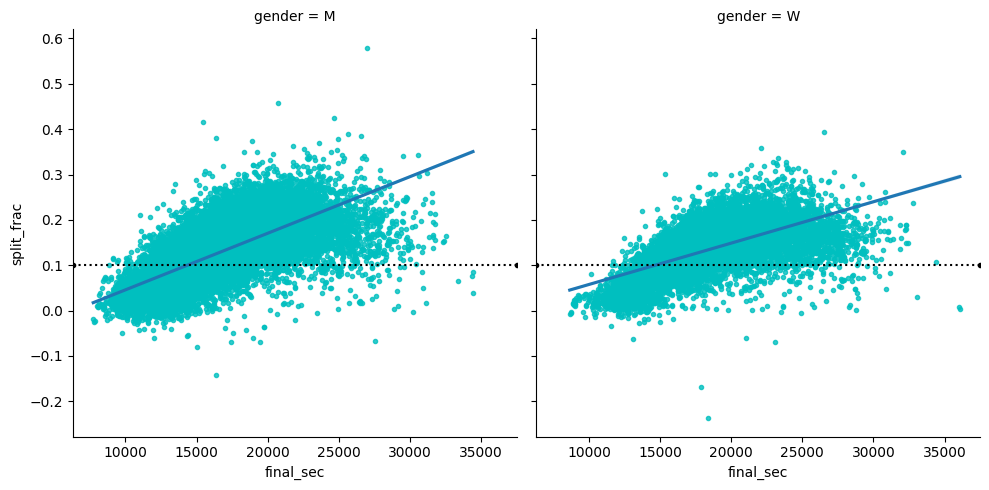

In [ ]:
g = sns.lmplot(x='final_sec', y='split_frac', col='gender', data=data,
    markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");
